__Dlib Library Also Offers the Edge Detection and Bright Point Detection Algorithms__

We Can Directly Use Classes like image_gradients and methods like find_bright_keypoints. I suspect they have used taylor series third point approximation in this will keep finding out be tuned.

In [92]:
import cv2
import numpy as np
from dlib import image_gradients,find_bright_keypoints
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
img = cv2.imread("test1.jpg",0)
print(img.shape) #Dimesions of this image is to0 high so let's resize it and don't let image ratio change
scale_percent = 10 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height) 
img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

(4426, 3059)


In [63]:
cv2.imshow("Image",img)
cv2.waitKey(5000)
cv2.destroyAllWindows()

In [34]:
print(img.shape) #Resized Dimenstions

(442, 305)


![Filters](assets/filters_dlib.png)

In [73]:
grad =image_gradients() #this is the class that inherits the above mentioned methods
x_filter = grad.get_x_filter()
y_filter = grad.get_y_filter()
xx_filter = grad.get_xx_filter()
yy_filter = grad.get_yy_filter()
xy_filter = grad.get_xy_filter()

In [74]:
x_filter

array([[-0.11280505,  0.        ,  0.11280505],
       [-0.2743899 ,  0.        ,  0.2743899 ],
       [-0.11280505,  0.        ,  0.11280505]], dtype=float32)

In [75]:
y_filter

array([[-0.11280505, -0.2743899 , -0.11280505],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.11280505,  0.2743899 ,  0.11280505]], dtype=float32)

In [76]:
xx_filter

array([[ 0.2256101, -0.4512202,  0.2256101],
       [ 0.5487798, -1.0975596,  0.5487798],
       [ 0.2256101, -0.4512202,  0.2256101]], dtype=float32)

In [77]:
yy_filter

array([[ 0.2256101,  0.5487798,  0.2256101],
       [-0.4512202, -1.0975596, -0.4512202],
       [ 0.2256101,  0.5487798,  0.2256101]], dtype=float32)

In [78]:
xy_filter

array([[ 0.25,  0.  , -0.25],
       [ 0.  ,  0.  ,  0.  ],
       [-0.25,  0.  ,  0.25]], dtype=float32)

In [79]:
corr_x = signal.correlate2d(img,x_filter,boundary='symm', mode='same')
corr_y = signal.correlate2d(img,y_filter,boundary='symm', mode='same')
corr_xx = signal.correlate2d(img,xx_filter,boundary='symm', mode='same')
corr_yy = signal.correlate2d(img,xx_filter,boundary='symm', mode='same')
corr_xy = signal.correlate2d(img,xy_filter,boundary='symm', mode='same')
bright_points = find_bright_keypoints(corr_xx,corr_xy,corr_yy)

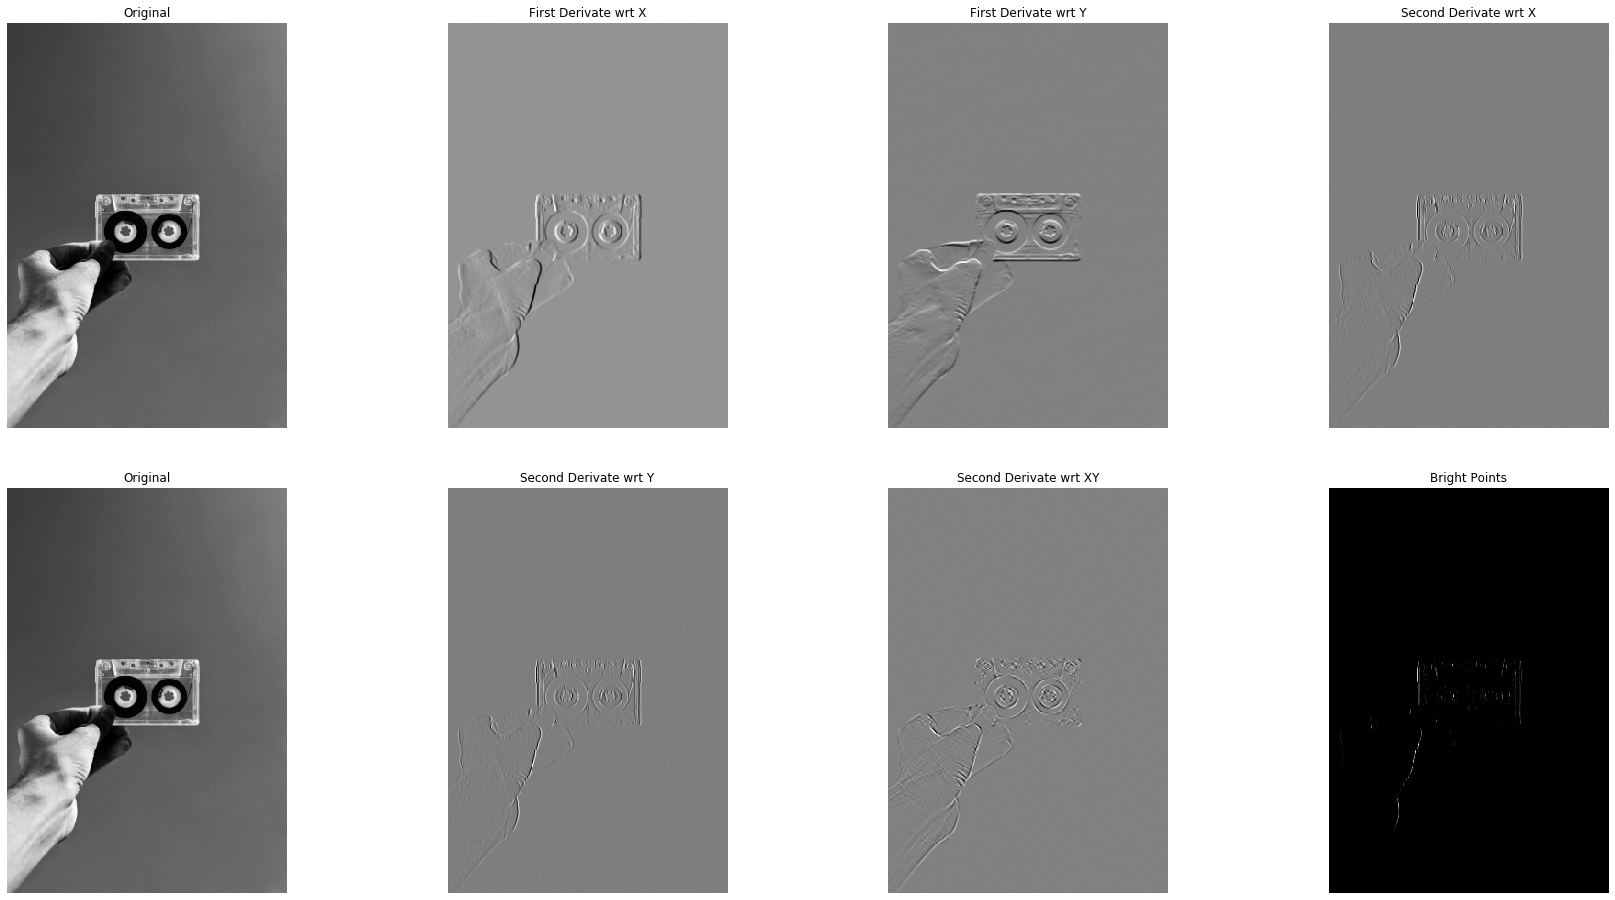

In [101]:
fig, ((ax_orig,ax_x, ax_y, ax_xx),(ax_orig_2,ax_yy, ax_xy,ax_bright)) = plt.subplots(2, 4,figsize=(30,16))
ax_orig.imshow(img, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_x.imshow(corr_x, cmap='gray')
ax_x.set_title('First Derivate wrt X')
ax_x.set_axis_off()
ax_y.imshow(corr_y, cmap='gray')
ax_y.set_title('First Derivate wrt Y')
ax_y.set_axis_off()
ax_xx.imshow(corr_xx, cmap='gray')
ax_xx.set_title('Second Derivate wrt X')
ax_xx.set_axis_off()
ax_orig_2.imshow(img, cmap='gray')
ax_orig_2.set_title('Original')
ax_orig_2.set_axis_off()
ax_yy.imshow(corr_yy, cmap='gray')
ax_yy.set_title('Second Derivate wrt Y')
ax_yy.set_axis_off()
ax_xy.imshow(corr_xy, cmap='gray')
ax_xy.set_title('Second Derivate wrt XY')
ax_xy.set_axis_off()
ax_bright.imshow(bright_points, cmap='gray')
ax_bright.set_title('Bright Points')
ax_bright.set_axis_off()
plt.subplots_adjust(wspace=0.25, hspace=0.15)
plt.savefig("image_gradients.png")

## __Resources__
### __test1.jpg__ => Photo by Swapnil Sharma from Pexels